# phase 3

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [18]:
df_crime = pd.read_csv(r"C:\crime\17_Crime_by_place_of_occurrence_2001_2012.csv")
df_crime.head(10)

,STATE/UT,YEAR,RESIDENTIAL PREMISES - Dacoity,RESIDENTIAL PREMISES - Robbery,RESIDENTIAL PREMISES - Burglary,RESIDENTIAL PREMISES - Theft,HIGHWAYS - Dacoity,HIGHWAYS - Robbery,HIGHWAYS - Burglary,HIGHWAYS - Theft,...,COMMERCIAL ESTABLISHMENTS - Burglary,COMMERCIAL ESTABLISHMENTS - Theft,OTHER PLACES - Dacoity,OTHER PLACES - Robbery,OTHER PLACES - Burglary,OTHER PLACES - Theft,TOTAL - Dacoity,TOTAL - Robbery,TOTAL - Burglary,TOTAL - Theft
0,ANDHRA PRADESH,2001,100,177,5158,4257,57,172,31,74,...,1041,2502,37,232,862,8849,214,629,7220,16751
1,ARUNACHAL PRADESH,2001,9,26,99,131,0,0,0,8,...,84,54,8,40,65,249,22,84,248,443
2,ASSAM,2001,381,191,1695,2901,46,136,7,87,...,442,967,77,261,271,1342,532,687,2423,5367
3,BIHAR,2001,818,326,2486,4741,162,826,0,257,...,231,686,210,880,505,2582,1291,2203,3233,9701
4,CHHATTISGARH,2001,54,42,3336,1417,10,38,12,72,...,370,299,15,239,420,2835,87,338,4144,4812
5,GOA,2001,3,10,185,65,0,3,0,3,...,109,64,4,8,57,436,7,25,359,576
6,GUJARAT,2001,105,181,3217,3639,58,113,2,116,...,889,1343,115,566,1002,10353,327,991,5142,15834
7,HARYANA,2001,25,52,2072,1930,11,71,12,88,...,534,684,36,210,400,3012,77,397,3109,6117
8,HIMACHAL PRADESH,2001,0,2,328,55,0,2,0,10,...,235,45,3,19,206,488,4,28,844,600
9,JAMMU & KASHMIR,2001,11,65,879,447,0,3,2,19,...,235,193,8,70,220,1260,24,161,1345,1919


In [6]:
df_crime=df_crime.dropna()

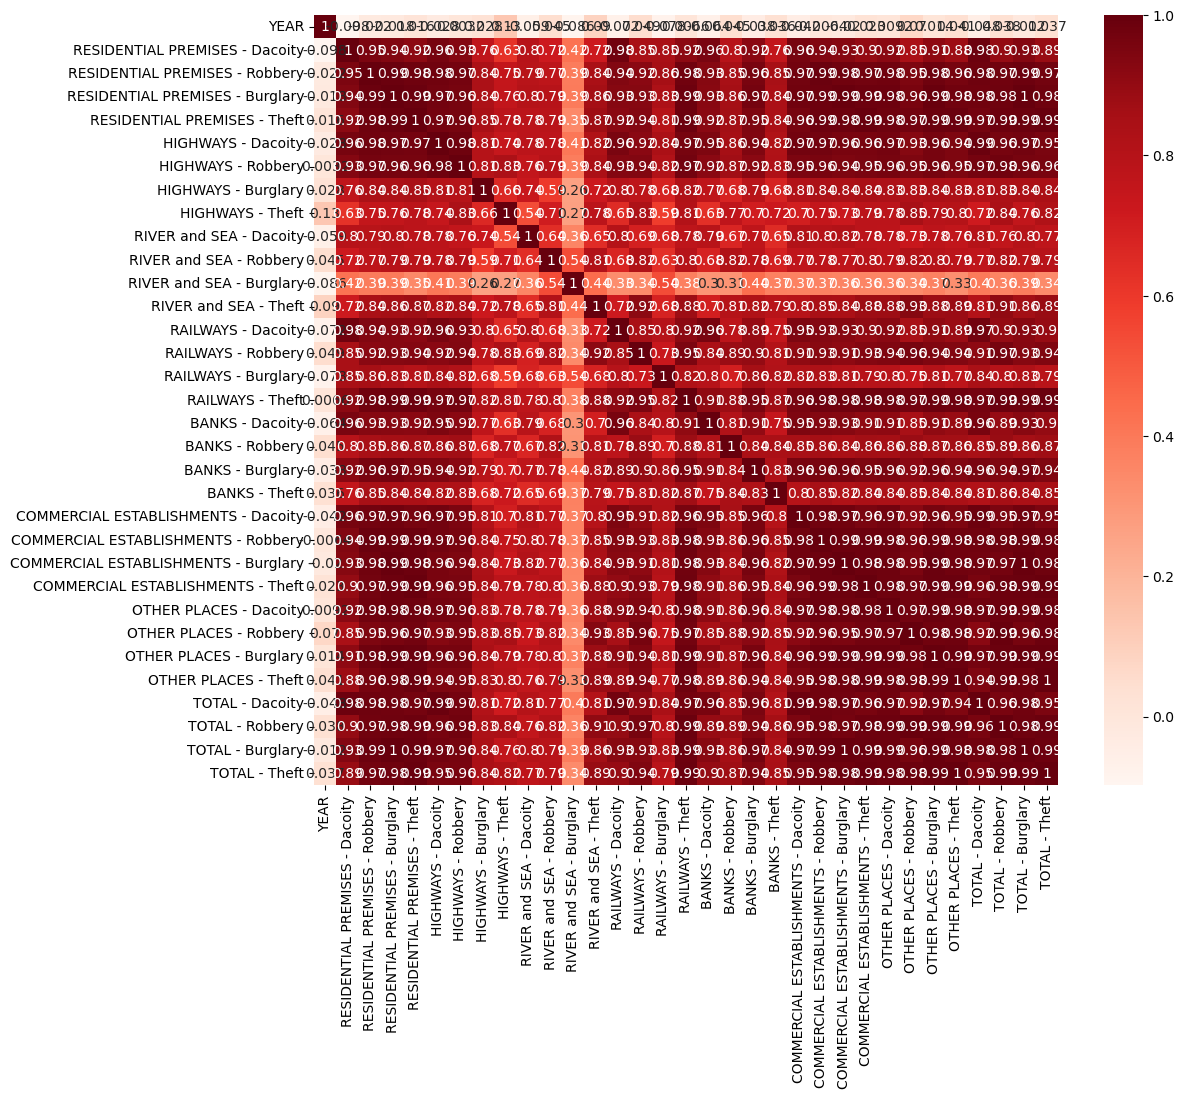

In [7]:
#finding correlation b/w all the coefficients sing Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_crime.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
#since total violent crimes is our target varibale
y = df_crime["TOTAL - Robbery"] 
cor_target = abs(cor["TOTAL - Robbery"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7] #if correlation > 0.7 then hihgly correlated
relevant_features
     

RESIDENTIAL PREMISES - Dacoity          0.897995
RESIDENTIAL PREMISES - Robbery          0.974684
RESIDENTIAL PREMISES - Burglary         0.978979
RESIDENTIAL PREMISES - Theft            0.985431
HIGHWAYS - Dacoity                      0.962603
HIGHWAYS - Robbery                      0.976243
HIGHWAYS - Burglary                     0.834801
HIGHWAYS - Theft                        0.841059
RIVER and SEA - Dacoity                 0.762402
RIVER and SEA - Robbery                 0.818009
RIVER and SEA - Theft                   0.906111
RAILWAYS - Dacoity                      0.900874
RAILWAYS - Robbery                      0.965485
RAILWAYS - Burglary                     0.798706
RAILWAYS - Theft                        0.988106
BANKS - Dacoity                         0.894310
BANKS - Robbery                         0.889583
BANKS - Burglary                        0.941744
BANKS - Theft                           0.855508
COMMERCIAL ESTABLISHMENTS - Dacoity     0.951699
COMMERCIAL ESTABLISH

In [22]:
x = df_crime[['RESIDENTIAL PREMISES - Dacoity','RESIDENTIAL PREMISES - Robbery','RESIDENTIAL PREMISES - Burglary','RESIDENTIAL PREMISES - Theft','HIGHWAYS - Dacoity','HIGHWAYS - Robbery','HIGHWAYS - Burglary','HIGHWAYS - Theft','RIVER and SEA - Dacoity','RIVER and SEA - Robbery','RIVER and SEA - Theft','RAILWAYS - Dacoity','RAILWAYS - Robbery','RAILWAYS - Burglary','RAILWAYS - Theft','BANKS - Dacoity','BANKS - Robbery','BANKS - Burglary','BANKS - Theft','COMMERCIAL ESTABLISHMENTS - Dacoity','COMMERCIAL ESTABLISHMENTS - Robbery','COMMERCIAL ESTABLISHMENTS - Burglary','COMMERCIAL ESTABLISHMENTS - Theft','OTHER PLACES - Dacoity','OTHER PLACES - Robbery','OTHER PLACES - Burglary','OTHER PLACES - Theft','TOTAL - Dacoity','TOTAL - Robbery','TOTAL - Burglary','TOTAL - Theft']]
y = df_crime['TOTAL - Robbery']

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 
     

In [24]:
from sklearn.linear_model import LinearRegression
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

n a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [25]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  3.637978807091713e-12
Coefficients:


[('RESIDENTIAL PREMISES - Dacoity', 0.02552795600175989),
 ('RESIDENTIAL PREMISES - Robbery', 0.12500000000007835),
 ('RESIDENTIAL PREMISES - Burglary', -2.499331702641989e-14),
 ('RESIDENTIAL PREMISES - Theft', -7.506478517953778e-14),
 ('HIGHWAYS - Dacoity', 0.02552795600174717),
 ('HIGHWAYS - Robbery', 0.1250000000000903),
 ('HIGHWAYS - Burglary', 2.796861533770985e-14),
 ('HIGHWAYS - Theft', -7.387624504682557e-14),
 ('RIVER and SEA - Dacoity', 0.02552795600277937),
 ('RIVER and SEA - Robbery', 0.12499999999993827),
 ('RIVER and SEA - Theft', -7.993084366887278e-14),
 ('RAILWAYS - Dacoity', 0.025527956002556834),
 ('RAILWAYS - Robbery', 0.12499999999979981),
 ('RAILWAYS - Burglary', 1.3957244660461302e-13),
 ('RAILWAYS - Theft', -7.292264176760941e-14),
 ('BANKS - Dacoity', 0.025527956002430983),
 ('BANKS - Robbery', 0.12499999999998275),
 ('BANKS - Burglary', -7.440294133238957e-14),
 ('BANKS - Theft', -8.77127084193158e-15),
 ('COMMERCIAL ESTABLISHMENTS - Dacoity', 0.025527956002

In [26]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [7.71000000e+02 1.62000000e+02 6.50000000e+01 4.74000000e+02
 3.38000000e+02 4.50000000e+01 1.17000000e+02 1.97500000e+03
 2.20700000e+03 7.00000000e+00 2.50000000e+01 9.00000000e+00
 4.00000000e+00 6.62000000e+02 1.60000000e+02 6.00000000e+00
 1.70340000e+04 7.51000000e+02 6.55000000e+02 1.34500000e+03
 7.79000000e+02 5.44000000e+02 9.52000000e+02 8.61000000e+02
 1.76730000e+04 2.13000000e+02 1.33000000e+02 8.30000000e+02
 8.75000000e+02 5.44000000e+02 9.58000000e+02 1.20000000e+01
 2.84000000e+03 8.29000000e+02 7.80000000e+02 1.40000000e+01
 5.00000000e+00 6.40000000e+01 5.00000000e+00 1.85200000e+04
 2.00000000e+00 2.80000000e+01 7.50000000e+01 4.01000000e+02
 5.05000000e+02 6.87000000e+02 3.00000000e+00 1.10000000e+01
 1.91000000e+02 6.36000000e+02 3.31000000e+02 2.06600000e+03
 6.60000000e+02 1.20000000e+01 2.30000000e+01 3.90000000e+02
 6.10000000e+01 8.16000000e+02 8.60000000e+01 5.35000000e+02
 5.90000000e+02 9.20000000e+01 2.60000000e+01 7.60000000e+02

In [27]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head(20)

,Actual value,Predicted value
237,771,771.0
368,162,162.0
366,65,65.0
149,474,474.0
4,338,338.0
114,45,45.0
131,117,117.0
240,1975,1975.0
429,2207,2207.0
66,7,7.0


In [28]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 100.00
Mean Absolute Error: 7.812717041536934e-12
Mean Square Error: 2.785037036062027e-22
Root Mean Square Error: 1.6688430231936217e-11
